El objetivo de este pairprogramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Recordamos que estas asunciones son:

1. Normalidad (ya la deberíais haber evaluado) 

2. Homogeneidad de varianzas 

3. Independencia de las variables

Cada asunción la deberéis testar de forma visual y analítica

In [1]:
#antes de empezar necesitaremos importar: 
#!pip install researchpy
#!pip install scipy

In [2]:
import pandas as pd
import random 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import researchpy as rp
import scipy.stats as stats
from scipy.stats import levene


plt.rcParams["figure.figsize"] = (10,8) 


In [3]:
df = pd.read_csv("Datos/possum2.csv", index_col = 0)
df.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,,,,
1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 1 to 104
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      104 non-null    int64  
 1   Pop       104 non-null    object 
 2   sex       104 non-null    object 
 3   age       104 non-null    float64
 4   hdlngth   104 non-null    float64
 5   skullw    104 non-null    float64
 6   totlngth  104 non-null    float64
 7   taill     104 non-null    float64
 8   footlgth  103 non-null    float64
 9   earconch  104 non-null    float64
 10  eye       104 non-null    float64
 11  chest     104 non-null    float64
 12  belly     104 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 11.4+ KB


1. Normalidad ----  No, nuestra variable respuesta "age" no cumple la asunción de normalidad

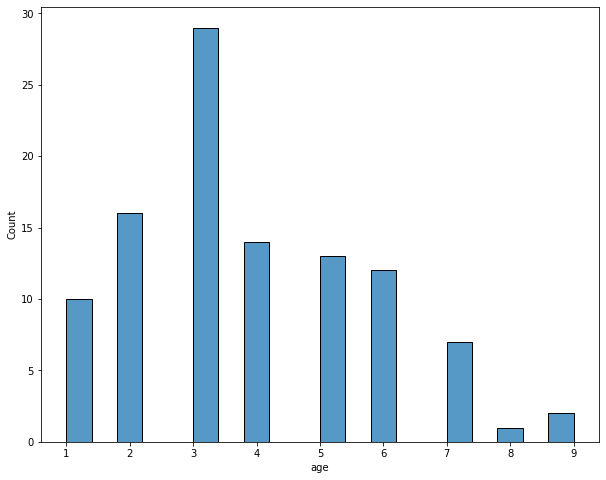

In [5]:
sns.histplot(df["age"],  bins=20);

In [6]:
stats.shapiro(df["age"])

ShapiroResult(statistic=0.9370304346084595, pvalue=9.287733701057732e-05)

2. Homogeneidaad de varianzas ------- Si la dispersión de los puntos es constante en todo el intervalo podremos decir que si se cumple la asunción de homogeneidad de varianzas, es el caso de comparar la edad con: localización, cola, torso, abdomen

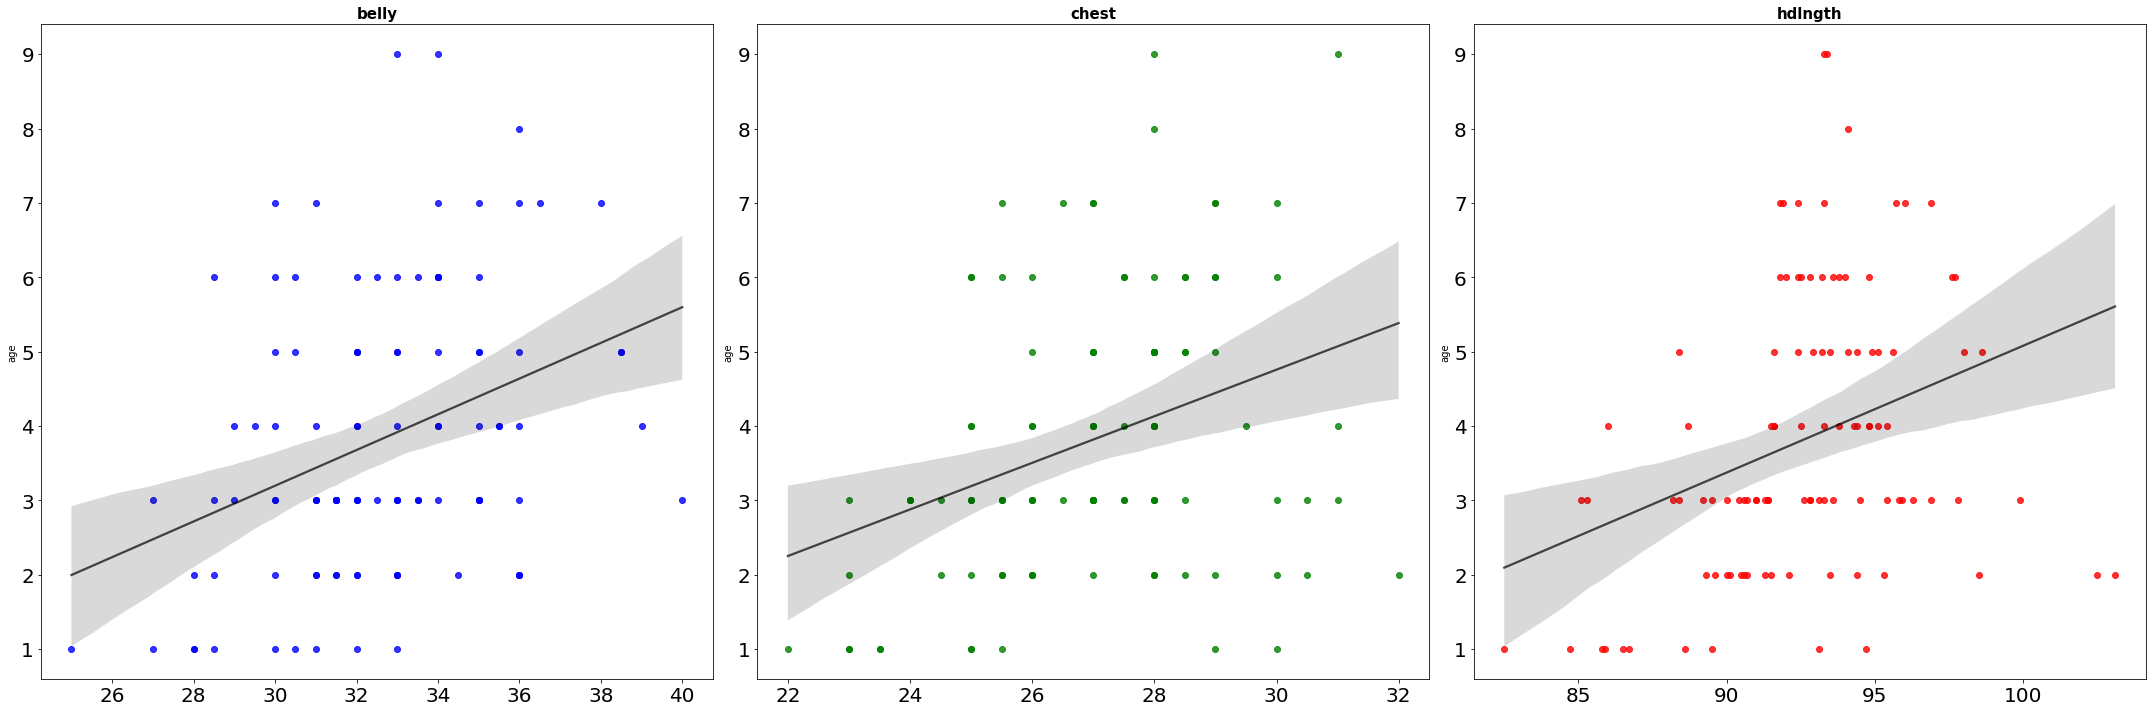

In [7]:
# iniciamos los subplots
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

# definimos una lista de colores. Cada color corresponderá a una gráfica
lista_caracteristicas = ["belly", "chest", "hdlngth"]

lista_colores = ["blue", "green", "red"]

# hemos creado una gráfica con varios subplots. Si queremos automatizar el proceso de relleno de cada uno de los plots
## podemos usar el método .flat. Lo que hace es aplanar los ejes para que queden en una única dimensión
## y luego los vamos rellenando. 
axes = axes.flat


# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(lista_caracteristicas): 
    sns.regplot(
        data = df,
        x = colum,
        y = 'age',
        color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout();

In [8]:
# creamos un diccionario para almacenar los resultados de los test
resultados = {}

#iteremos por la lista de las columnas numéricas
for col in lista_caracteristicas:
    # calculamos el p-valor de test
    statistic, p_val = levene(df[col], df.age, center='median')
    # lo almacenamos en el diccionario
    resultados[col] = p_val

In [9]:
resultados

{'belly': 0.0019542239421034744,
 'chest': 0.493144118916215,
 'hdlngth': 2.8435343265718365e-05}

In [10]:
# Chest cumple la asuncion de homocedasticidad, las otras dos, no

3. Independencia de las variables ---- El valor p es 0.0458, por lo que rechazaremos la hipótesis nula y concluimos que las variables son dependientes entre ellas, no hay independencia.

In [11]:
# comparamos las variables predictoras entre ellas
# belly con chest
# belly con hdlngth
# chest con hdlngth

In [12]:
crosstab1, test_results1, expected = rp.crosstab(df["chest"], df["belly"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [13]:
crosstab1.head()

belly                                                     ...       \
belly  25.0  27.0  28.0  28.5 29.0 29.5  30.0  30.5  31.0 31.5  ... 34.5   
chest                                                           ...        
22.0    0.0  0.00  0.00  0.96  0.0  0.0  0.00  0.00  0.00  0.0  ...  0.0   
23.0    0.0  1.92  1.92  0.00  0.0  0.0  0.00  0.00  0.00  0.0  ...  0.0   
23.5    0.0  0.00  0.96  0.00  0.0  0.0  0.00  0.96  0.00  0.0  ...  0.0   
24.0    0.0  0.00  0.00  0.00  0.0  0.0  0.96  0.00  0.96  0.0  ...  0.0   
24.5    0.0  0.00  0.00  0.00  0.0  0.0  0.00  0.00  0.00  0.0  ...  0.0   

                                                      
belly  35.0 35.5 36.0 36.5 38.0 38.5 39.0 40.0   All  
chest                                                 
22.0   0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.96  
23.0   0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.85  
23.5   0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.92  
24.0   0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.88  
24.5   0.96  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.92  

[5 rows x 25 columns]

In [14]:
test_results1

,Chi-square test,results
0,Pearson Chi-square ( 414.0) =,510.8844
1,p-value =,0.0008
2,Cramer's V =,0.5224


In [15]:
# Entonces chest y belly no son indepedientes

In [16]:
crosstab2, test_results2, expected = rp.crosstab(df["chest"], df["hdlngth"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [17]:
crosstab2.head()

hdlngth                                                   ...       \
hdlngth    82.5 84.7  85.1 85.3  85.8 85.9 86.0  86.5  86.7 88.2  ... 97.6   
chest                                                             ...        
22.0       0.00  0.0  0.00  0.0  0.96  0.0  0.0  0.00  0.00  0.0  ...  0.0   
23.0       0.00  0.0  0.96  0.0  0.00  0.0  0.0  0.96  0.00  0.0  ...  0.0   
23.5       0.96  0.0  0.00  0.0  0.00  0.0  0.0  0.00  0.96  0.0  ...  0.0   
24.0       0.00  0.0  0.00  0.0  0.00  0.0  0.0  0.00  0.00  0.0  ...  0.0   
24.5       0.00  0.0  0.00  0.0  0.00  0.0  0.0  0.00  0.00  0.0  ...  0.0   

                                                         
hdlngth 97.7 97.8 98.0 98.5 98.6 99.9 102.5 103.1   All  
chest                                                    
22.0     0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.96  
23.0     0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  3.85  
23.5     0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  1.92  
24.0     0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  2.88  
24.5     0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  1.92  

[5 rows x 72 columns]

In [18]:
test_results2

,Chi-square test,results
0,Pearson Chi-square ( 1260.0) =,1387.9907
1,p-value =,0.0065
2,Cramer's V =,0.8611


In [19]:
# Entonces chest y belly no son indepedientes

In [20]:
crosstab3, test_results3, expected = rp.crosstab(df["hdlngth"], df["belly"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [21]:
crosstab3.head()

belly                                                  ...            \
belly    25.0  27.0  28.0  28.5 29.0 29.5 30.0 30.5 31.0 31.5  ... 34.5 35.0   
hdlngth                                                        ...             
82.5     0.00  0.00  0.96  0.00  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
84.7     0.96  0.00  0.00  0.00  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
85.1     0.00  0.96  0.00  0.00  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
85.3     0.00  0.00  0.00  0.00  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
85.8     0.00  0.00  0.00  0.96  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

                                                  
belly   35.5 36.0 36.5 38.0 38.5 39.0 40.0   All  
hdlngth                                           
82.5     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.96  
84.7     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.96  
85.1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.96  
85.3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.96  
85.8     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.96  

[5 rows x 25 columns]

In [22]:
test_results3


,Chi-square test,results
0,Pearson Chi-square ( 1610.0) =,1682.8913
1,p-value =,0.1007
2,Cramer's V =,0.8388


In [23]:
# hdlntgth y belly son independientes

In [24]:
# resumen

# la variable respuesta no es normal
# me puedo quedar como variables independientes o bien chest, o bien belly y hdlngth
# por homocedasticidad, chest
